In [ ]:
import pandas as pd


df = pd.read_csv(r'/content/car.csv')


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1728 non-null   int64 
 1   buying      1728 non-null   object
 2   maint       1728 non-null   object
 3   doors       1728 non-null   object
 4   persons     1728 non-null   object
 5   lug_boot    1728 non-null   object
 6   safety      1728 non-null   object
 7   class       1728 non-null   object
dtypes: int64(1), object(7)
memory usage: 108.1+ KB


In [ ]:
df.shape[0] # samples

1728

In [ ]:
df.shape[1] #features

8

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
class,0


In [ ]:
import pandas as pd
import statsmodels.api as sm

df = pd.read_csv(r'/content/car.csv')

# Check for unique values in each column to identify potential mapping issues
for col in df.columns:
    print(f"Unique values in {col}: {df[col].unique()}")

# Improved mapping with error handling to avoid NaN values
mapping_dict = {
    'buying': {'vhigh': 0, 'high': 1, 'med': 2, 'low': 3},
    'doors': {'2': 0, '3': 1, '4': 2, '5more': 3},
    'lug_boot': {'small': 0, 'med': 1, 'big': 2},
    'class': {'unacc': 0, 'acc': 1, 'good': 2, 'vgood': 3}, # corrected 'class' mapping
    'maint': {'vhigh': 0, 'high': 1, 'med': 2, 'low': 3},
    'persons': {'2': 0, '4': 1, 'more': 2},
    'safety': {'low': 0, 'med': 1, 'high': 2}
}


for col, mapping in mapping_dict.items():
    df[col] = df[col].map(mapping).fillna(-1) # Replace NaN with -1 or another placeholder


X = df.drop('class', axis=1)
Y = df['class']
x_const = sm.add_constant(X)

df.head()

Unique values in Unnamed: 0: [   0    1    2 ... 1725 1726 1727]
Unique values in buying: ['vhigh' 'high' 'med' 'low']
Unique values in maint: ['vhigh' 'high' 'med' 'low']
Unique values in doors: ['2' '3' '4' '5more']
Unique values in persons: ['2' '4' 'more']
Unique values in lug_boot: ['small' 'med' 'big']
Unique values in safety: ['low' 'med' 'high']
Unique values in class: ['unacc' 'acc' 'vgood' 'good']


,Unnamed: 0,buying,maint,doors,persons,lug_boot,safety,class
0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0
2,2,0,0,0,0,0,2,0
3,3,0,0,0,0,1,0,0
4,4,0,0,0,0,1,1,0


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
class,0


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(x_const,Y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_predicted =model.predict(x_const)
y_predicted

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train.value_counts()


,,,,,,,count
Unnamed: 0,buying,maint,doors,persons,lug_boot,safety,
1727,3,3,3,2,2,2,1
0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,1
2,0,0,0,0,0,2,1
3,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...
10,0,0,0,1,0,1,1
9,0,0,0,1,0,0,1
8,0,0,0,0,2,2,1


In [ ]:
# Explanation of the 'class' column values after mapping:

# The 'class' column represents the evaluation of the car.
# The original values were strings: 'unacc', 'acc', 'good', 'vgood'.
# These have been mapped to numerical values for the model:

# 0: 'unacc' (unacceptable)
# 1: 'acc' (acceptable)
# 2: 'good'
# 3: 'vgood' (very good)

# This numerical representation allows the logistic regression model to work with the data.


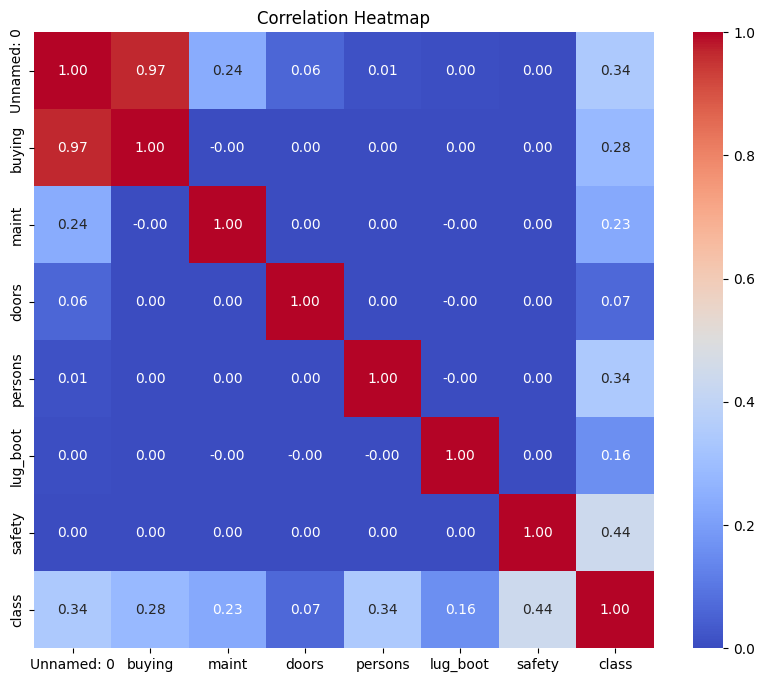

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

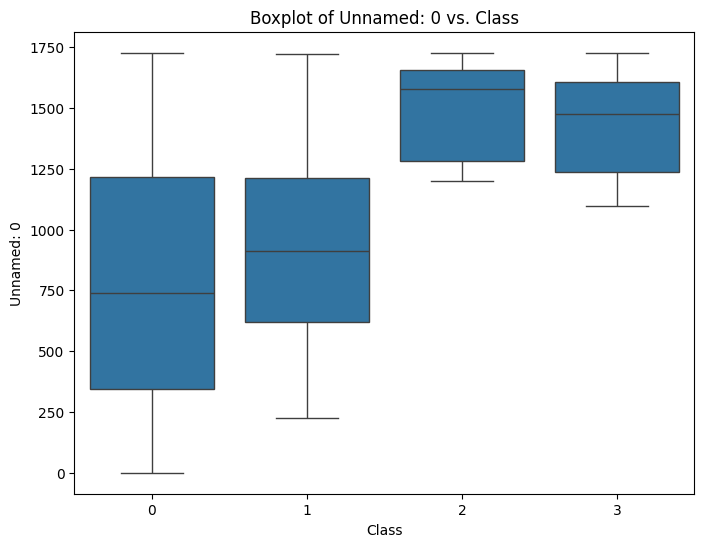

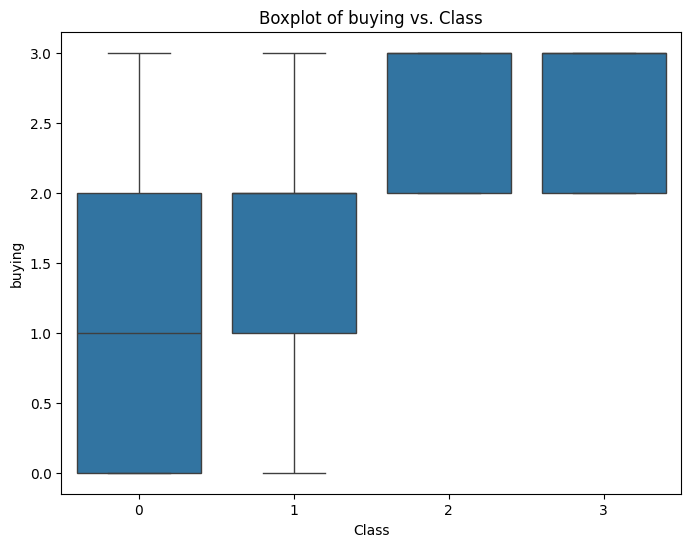

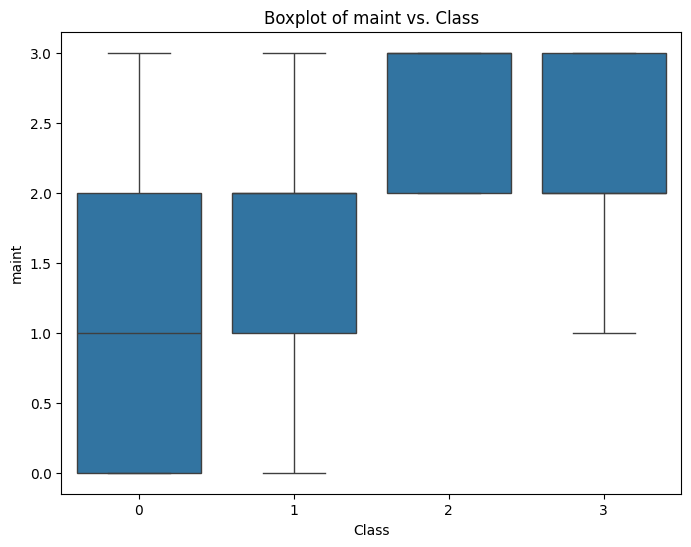

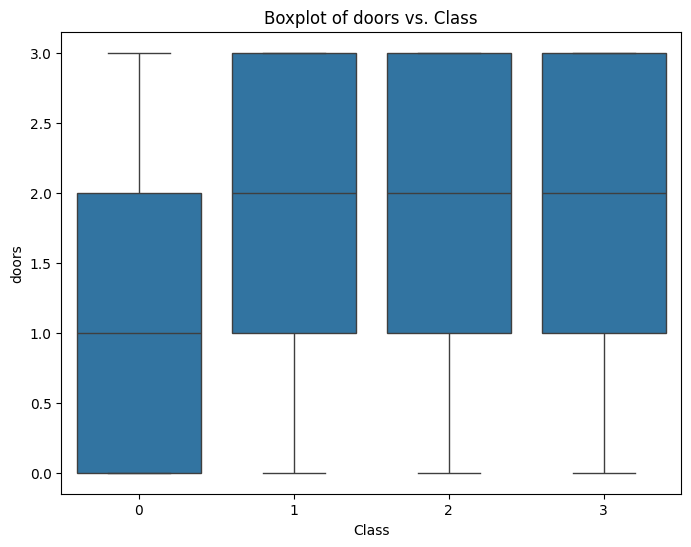

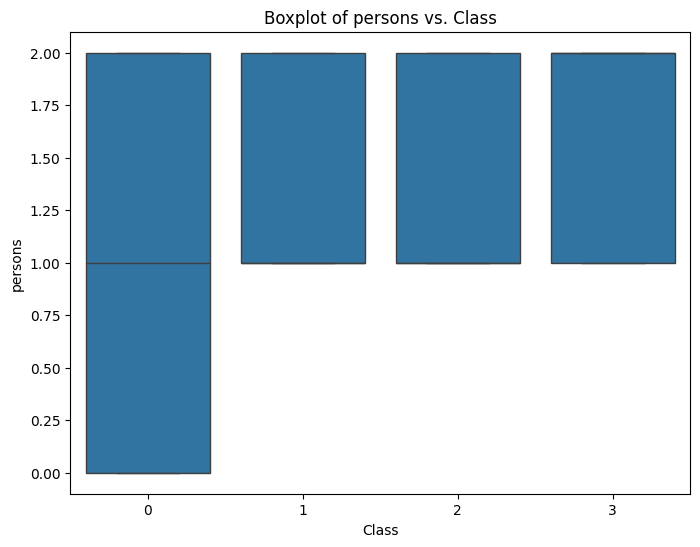

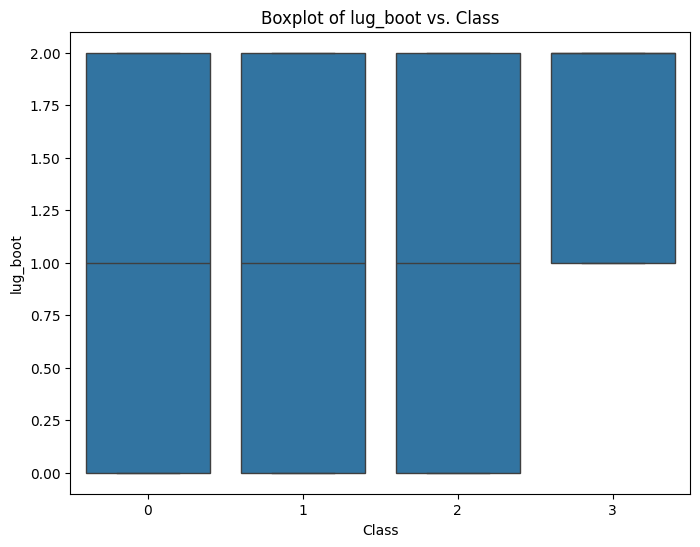

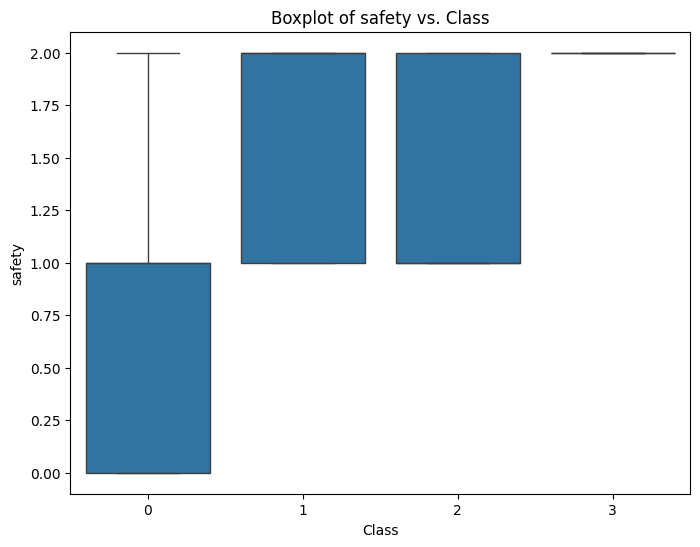

In [ ]:
import matplotlib.pyplot as plt
# Visualize the relationship between each feature and the target variable ('class')
for col in X.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='class', y=col, data=df)
    plt.title(f'Boxplot of {col} vs. Class')
    plt.xlabel('Class')
    plt.ylabel(col)
    plt.show()


In [ ]:
# prompt: Model Training:
# ○ Train and evaluate a classification model (Logistic Regression, Random Forest,
# etc.).
# ○ Use train-test split and show accuracy, precision, recall.

from sklearn.metrics import accuracy_score, precision_score, recall_score

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted') # Use weighted average for multi-class
recall = recall_score(y_test, y_pred, average='weighted') # Use weighted average for multi-class

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.708092485549133
Precision: 0.6547362865259879
Recall: 0.708092485549133


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# prompt: 6. Feature Importance (optional):
# ○ Identify and rank the most important features affecting heart disease

import pandas as pd
# Feature Importance using coefficients from LogisticRegression

# Get the coefficients from the trained model
coefficients = model.coef_[0]  # Access the first row (only one set of coefficients)

# Create a DataFrame to store feature names and their corresponding importances
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})

# Sort the DataFrame by the absolute value of the Coefficient to rank features
feature_importance = feature_importance.reindex(feature_importance['Coefficient'].abs().sort_values(ascending=False).index)


print("\nFeature Importance based on LogisticRegression Coefficients:")
feature_importance


#Alternatively, if you were using DecisionTreeClassifier you could use feature_importances_
# from sklearn.tree import DecisionTreeClassifier
# tree_model = DecisionTreeClassifier()
# tree_model.fit(X_train, y_train)
# feature_importances = tree_model.feature_importances_
# feature_importance_tree = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
# feature_importance_tree = feature_importance_tree.sort_values('Importance', ascending=False)
# print(feature_importance_tree)


Feature Importance based on LogisticRegression Coefficients:


,Feature,Coefficient
6,safety,-0.978255
4,persons,-0.491282
5,lug_boot,0.402504
2,maint,-0.275744
3,doors,0.093306
1,buying,0.072806
0,Unnamed: 0,-0.000959


In [ ]:
# prompt: Model Comparison:
# ○ Compare multiple models: Logistic Regression, KNN, Random Forest, Decision
# Tree

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Initialize models
knn_model = KNeighborsClassifier()
rf_model = RandomForestClassifier(random_state=42)  # Added random_state for reproducibility
dt_model = DecisionTreeClassifier(random_state=42)  # Added random_state for reproducibility

# Train and evaluate each model
models = {
    "KNN": knn_model,
    "Random Forest": rf_model,
    "Decision Tree": dt_model,
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"--- {name} ---")
    print(classification_report(y_test, y_pred))
    print("---")


--- KNN ---
              precision    recall  f1-score   support

           0       0.73      0.88      0.79       235
           1       0.47      0.28      0.35        83
           2       0.08      0.09      0.08        11
           3       0.00      0.00      0.00        17

    accuracy                           0.66       346
   macro avg       0.32      0.31      0.31       346
weighted avg       0.61      0.66      0.63       346

---


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       235
           1       0.97      0.86      0.91        83
           2       0.56      0.91      0.69        11
           3       0.93      0.82      0.88        17

    accuracy                           0.95       346
   macro avg       0.86      0.90      0.87       346
weighted avg       0.96      0.95      0.95       346

---
--- Decision Tree ---
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       235
           1       1.00      0.98      0.99        83
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        17

    accuracy                           0.99       346
   macro avg       1.00      0.99      1.00       346
weighted avg       0.99      0.99      0.99       346

---


In [ ]:
# prompt: . Model deployment:
# ● Find best model in terms of F1 score and deploy it to streamlit

import streamlit as st
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load your data (replace with your actual data loading)
df = pd.read_csv(r'/content/car.csv')

# Mapping (as provided in your code)
mapping_dict = {
    'buying': {'vhigh': 0, 'high': 1, 'med': 2, 'low': 3},
    'doors': {'2': 0, '3': 1, '4': 2, '5more': 3},
    'lug_boot': {'small': 0, 'med': 1, 'big': 2},
    'class': {'unacc': 0, 'acc': 1, 'good': 2, 'vgood': 3},
    'maint': {'vhigh': 0, 'high': 1, 'med': 2, 'low': 3},
    'persons': {'2': 0, '4': 1, 'more': 2},
    'safety': {'low': 0, 'med': 1, 'high': 2}
}

for col, mapping in mapping_dict.items():
    df[col] = df[col].map(mapping).fillna(-1)

X = df.drop('class', axis=1)
y = df['class']  # Use 'y' instead of 'Y' for consistency
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the best model (RandomForestClassifier in this example)
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_train, y_train)

# Streamlit app
st.title("Car Evaluation Model")

# Input features (replace with actual input fields)
buying = st.selectbox("Buying Price", list(mapping_dict['buying'].keys()))
maint = st.selectbox("Maintenance Price", list(mapping_dict['maint'].keys()))
doors = st.selectbox("Number of Doors", list(mapping_dict['doors'].keys()))
persons = st.selectbox("Number of Persons", list(mapping_dict['persons'].keys()))
lug_boot = st.selectbox("Luggage Boot Size", list(mapping_dict['lug_boot'].keys()))
safety = st.selectbox("Safety", list(mapping_dict['safety'].keys()))


# Create input dataframe
input_data = pd.DataFrame({
    'buying': [mapping_dict['buying'][buying]],
    'maint': [mapping_dict['maint'][maint]],
    'doors': [mapping_dict['doors'][doors]],
    'persons': [mapping_dict['persons'][persons]],
    'lug_boot': [mapping_dict['lug_boot'][lug_boot]],
    'safety': [mapping_dict['safety'][safety]]
})

# Make prediction
if st.button("Predict"):
    prediction = best_model.predict(input_data)[0]
    st.write(f"Predicted Car Class: {list(mapping_dict['class'].keys())[int(prediction)]}")

    # Display classification report (optional)
    y_pred = best_model.predict(X_test)
    st.text(classification_report(y_test, y_pred))


2025-04-07 15:20:34.613 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-07 15:20:34.721 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-04-07 15:20:34.722 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-07 15:20:34.724 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-07 15:20:34.725 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-07 15:20:34.726 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-07 15:20:34.728 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-07 15:20:34.729 Session state does not 

In [ ]:
!pip install streamlit
!pip install pyngrok
!pip install streamlit-authenticator


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 97.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 94.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.6/147.6 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 52.6 MB/s eta 0:00:00
